In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables

#UNCLEAR WHAT THE ABOVE IS ASKING, all base needs is engine to work ; session helps with using sql functions

Base = automap_base()


In [7]:
Base.prepare(autoload_with=engine) 

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
##TEST
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20313dadd50>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [12]:
##TEST
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20313dad690>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [13]:
# Find the most recent date in the data set.
#Date is contained in the measurement table; sort by date? 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

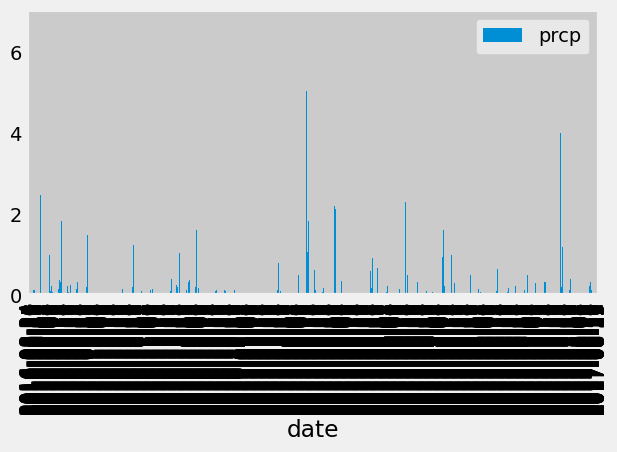

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precip_16_17 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
#https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure 

df = pd.DataFrame(precip_16_17, columns =['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
##FORMAT
df.plot.bar()
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
##INCORRECT SHOULD BE 2021
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
##what is purpose of .all()?

count = func.count(Measurement.station)
station_total = session.query(Measurement.station, count).\
    group_by(Measurement.station).\
        order_by(count.desc()).all()

station_total


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281; below returns NONE
session.query(func.avg(Measurement.tobs).\
         filter(Measurement.station) == 'USC00519281').all()

#Find low/first and high/last 
high = session.query(Measurement.tobs).order_by(Measurement.tobs.desc()).first()
low = session.query(Measurement.tobs).order_by(Measurement.tobs).first()

(53.0,)

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# USC00519281 

session.query(Measurement.tobs).order_by(Measurement.tobs.desc()).first()

(87.0,)

# Close Session

In [16]:
# Close Session
session.close()